<a href="https://colab.research.google.com/github/Jbs32JJB/Codeup/blob/master/%EA%B5%AD%EB%AF%BC_%EB%8F%85%EC%84%9C%EB%9F%89_%EB%8F%85%EC%84%9C_%ED%99%98%EA%B2%BD_%EA%B0%9C%EC%84%A0%EC%9D%84_%EC%9C%84%ED%95%9C_%EB%8F%84%EC%84%9C%EA%B4%80_%ED%86%B5%EA%B3%84_%EB%B0%8F_%EC%97%AC%EA%B0%80%ED%99%9C%EB%8F%99_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


데이터분석 주제 : 전국 도서관 통계와 국민 여가활동, 독서 데이터를 이용하여 독서량 증감 추세 파악, 독서 환경 개선을 위한 해결방안 고민해 보기

주제 선정 이유 : 나를 비롯해 많은 사람들이 책을 읽는 대신 유튜브나 인터넷을 통해 지식을 습득하고, 그 외의 이유더라도 여가 시간에 책을 읽는 사람을 보는 것이 예전에 비해 많이 힘들어졌다고 생각한다. 그래서 전국 도서관 통계를 활용해 대출량이 연도별로 어떻게 변하였는지, 도서관 설치 수나 운영 비는 어떻게 변하였는지를 보고 나라가 투자한 만큼의 성과가 있었는지, 또 국민 여가 실태조사를 활용해 국민이 연도별, 계층별로 가장 많이 참여한 여가활동이 무엇인지 알아보자, 성인과 학생 독서율을 별도 조사하여 독서율이 어떻게 되는지, 그 이유는 무엇인지 파악하여 전체적으로 독서량과 독서 환경 개선을 위해 우리 학생과 성인들에게 어떠한 정책이 필요할 것인지 고민하여 보는 시간을 가져보고 싶다. 그래서 이러한 주제를 선정하게 되었다.


출처 : KOSIS

사용한 데이터 ( 총 5개 )

1. 지난 1년동안 한 번 이상 참여한 여가활동 ( 1yactivity.csv )
2. 독서 활동 비참여 이유 ( whynotread.csv )
3. 종이책 독서율( 학생 ) ( howmanyreadstu.csv )
4. 종이책 독서율( 성인 ) ( howmanyreadadu.csv )
5. 전국 도서관 현황 ( library1.csv )

1. 사전작업 ( 결측치 처리와 한글 인코딩 )

In [1]:
## '-'결측치 처리 ( 0으로 변경 )
import pandas as pd

df = pd.read_csv('library.csv')

df = df.replace('-', 0)



In [39]:
## 한글


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

2-1. 데이터 분석 - 도서관 통계 ( library1.csv )

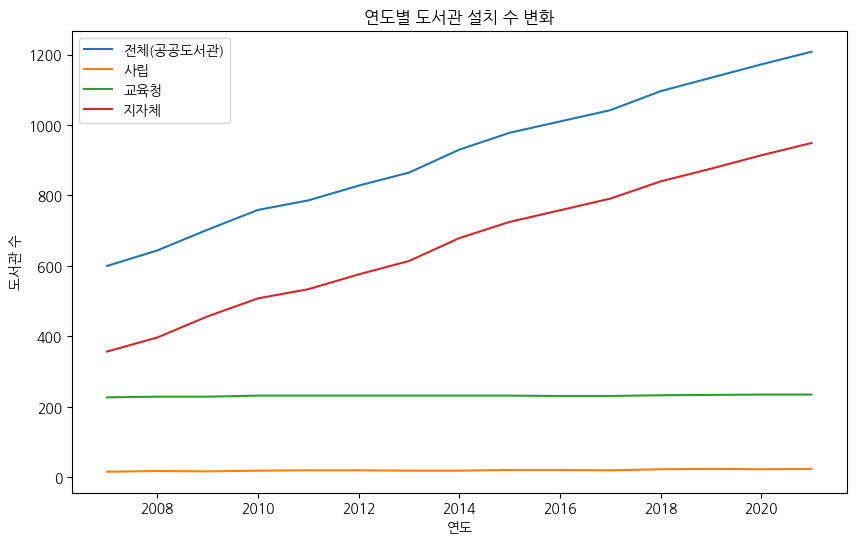

In [7]:
# 도서관 설치 수에 대해 알아보자

import csv
import seaborn as sns
import matplotlib.pyplot as plt

f = open('library1.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

plt.rcParams['font.family'] = 'NanumGothic'

years = []
a = []
b = []
c = []
d = []

for row in data:
    if '도서관수' in row[0]:
        years = [int(year) for year in header[2:]]
        if '전체(공공도서관)' in row[1]:
            a = [int(count) for count in row[2:]]
        elif '사립' in row[1]:
            b = [int(count) for count in row[2:]]
        elif '교육청' in row[1]:
            c = [int(count) for count in row[2:]]
        elif '지자체' in row[1]:
            d = [int(count) for count in row[2:]]


plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=a, label='전체(공공도서관)')
sns.lineplot(x=years, y=b, label='사립')
sns.lineplot(x=years, y=c, label='교육청')
sns.lineplot(x=years, y=d, label='지자체')

plt.xlabel('연도')
plt.ylabel('도서관 수')
plt.title('연도별 도서관 설치 수 변화')

plt.legend()
plt.show()


- 도서관 설치 수는 매년 증가하고 있으며, 사립과 교육청에서 설치한 도서관 수는 거의 변화가 없는 반면, 지자체에서 설립한 도서관은 수가 매우 크게 늘었음을 알 수 있다.

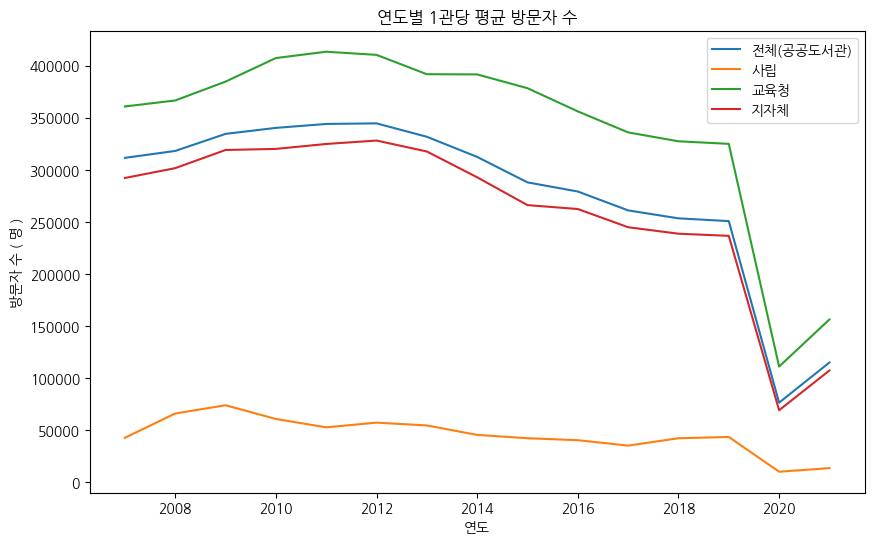

In [8]:
# 연도별 1관당 평균 방문자 수는 증가할까?

import csv
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

f = open('library1.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

years = []
a = []
b = []
c = []
d = []

for row in data:
    if '1관당 방문자 수 (명)' in row[0]:
        years = [int(year) for year in header[2:]]
        if '전체(공공도서관)' in row[1]:
            a = [int(count) for count in row[2:]]
        elif '사립' in row[1]:
            b = [int(count) for count in row[2:]]
        elif '교육청' in row[1]:
            c = [int(count) for count in row[2:]]
        elif '지자체' in row[1]:
            d = [int(count) for count in row[2:]]


plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=a, label='전체(공공도서관)')
sns.lineplot(x=years, y=b, label='사립')
sns.lineplot(x=years, y=c, label='교육청')
sns.lineplot(x=years, y=d, label='지자체')

plt.xlabel('연도')
plt.ylabel('방문자 수 ( 명 )')
plt.title('연도별 1관당 평균 방문자 수')

plt.legend()
plt.show()


- ㅇ0ㅇ 대략 2011년 이후로 완만한 감소세를 보이다가 2020년에 큰일났다!


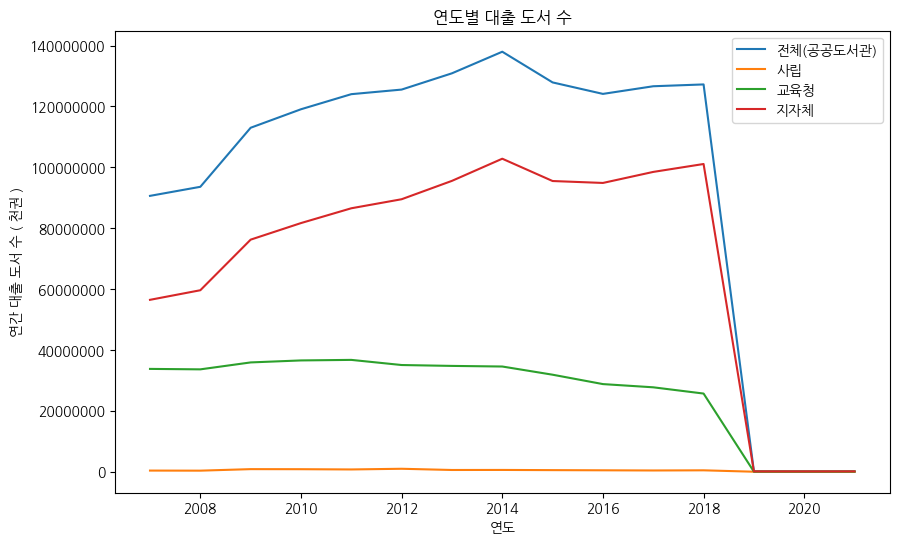

In [9]:
# 연도별 대출 도서 수는 어떨까?

import csv
import seaborn as sns
import matplotlib.pyplot as plt

f = open('library1.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

plt.rcParams['font.family'] = 'NanumGothic'

years = []
a = []
b = []
c = []
d = []

for row in data:
    if '연간 대출 도서 수 (천권)' in row[0]:
        years = [int(year) for year in header[2:]]
        if '전체(공공도서관)' in row[1]:
            a = [int(count) for count in row[2:]]
        elif '사립' in row[1]:
            b = [int(count) for count in row[2:]]
        elif '교육청' in row[1]:
            c = [int(count) for count in row[2:]]
        elif '지자체' in row[1]:
            d = [int(count) for count in row[2:]]

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=a, label='전체(공공도서관)')
sns.lineplot(x=years, y=b, label='사립')
sns.lineplot(x=years, y=c, label='교육청')
sns.lineplot(x=years, y=d, label='지자체')

plt.xlabel('연도')
plt.ylabel('연간 대출 도서 수 ( 천권 )')
plt.title('연도별 대출 도서 수')


plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.show()


- ㅇ0ㅇ ㅋㅋㅋㅋㅋ 확실히 2019년 이후 책을 읽지 않는 모습을 보임 ..


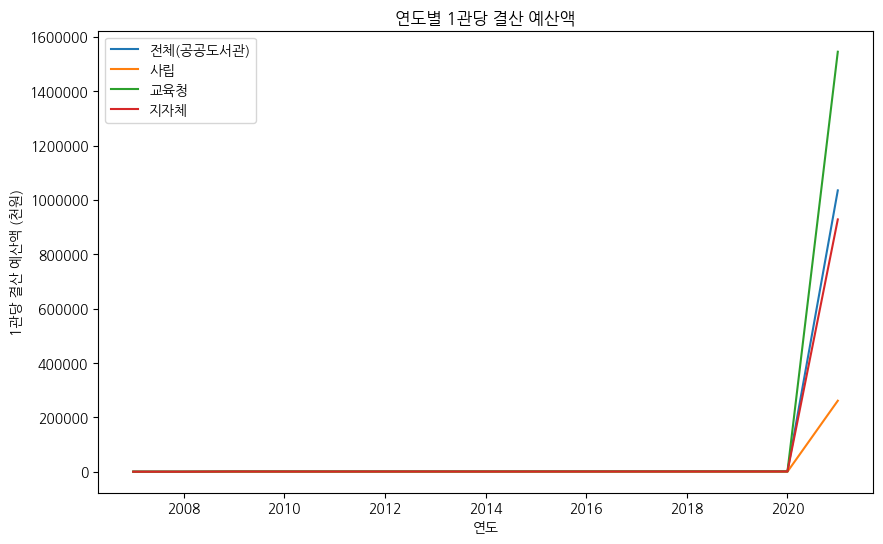

In [10]:
# 그렇다면 편성된 총 예산액은 ( 나라가 얼마나 투자하는지에 대한 지표라고 생각한다. )

import csv
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

f = open('library1.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

years = []
a = []
b = []
c = []
d = []

for row in data:
    if '1관당 결산 예산액 (천원)' in row[0]:
        years = [int(year) for year in header[2:]]
        if '전체(공공도서관)' in row[1]:
            a = [int(count) for count in row[2:]]
        elif '사립' in row[1]:
            b = [int(count) for count in row[2:]]
        elif '교육청' in row[1]:
            c = [int(count) for count in row[2:]]
        elif '지자체' in row[1]:
            d = [int(count) for count in row[2:]]

plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=a, label='전체(공공도서관)')
sns.lineplot(x=years, y=b, label='사립')
sns.lineplot(x=years, y=c, label='교육청')
sns.lineplot(x=years, y=d, label='지자체')

plt.xlabel('연도')
plt.ylabel('1관당 결산 예산액 (천원)')
plt.title('연도별 1관당 결산 예산액')


plt.ticklabel_format(style='plain', axis='y')

plt.legend()
plt.show()


- 이게 코드가 잘못된 것이 아님을 알려드립니다. 실제로 2020년과 2021년의 데이터 차이가 너무 큽니다. ( 최근 들어 투자를 많이 하게 됬다는 뜻인가..? )
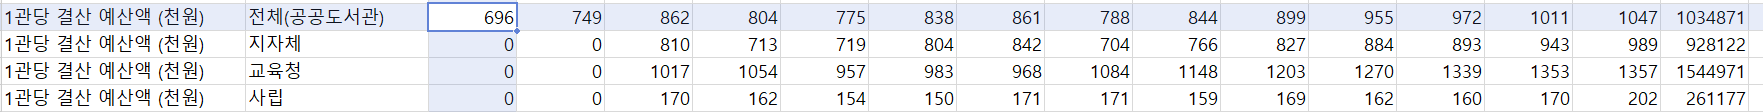



- 정말 만약에 마지막 년도가 1034.871 ( 천원 ) 이라면 그래프는 어떻게 그려질까요 ? ( 그래프 스타일도 바꿔보겠습니다 )



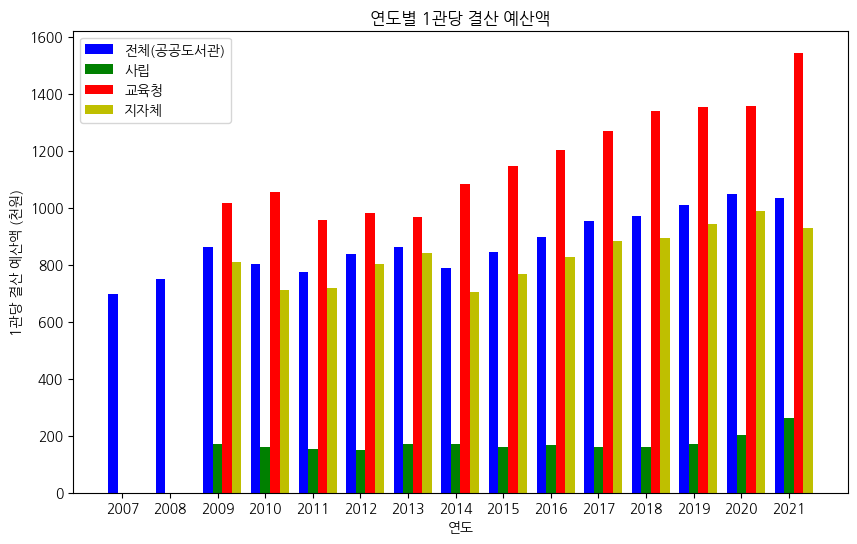

In [14]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

f = open('library1.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

plt.rcParams['font.family'] = 'NanumGothic'

years = []
a = []
b = []
c = []
d = []

for row in data:
    if '1관당 결산 예산액 (천원)' in row[0]:
        years = [int(year) for year in header[2:]]
        if '전체(공공도서관)' in row[1]:
            a = [int(count) for count in row[2:]]
        elif '사립' in row[1]:
            b = [int(count) for count in row[2:]]
        elif '교육청' in row[1]:
            c = [int(count) for count in row[2:]]
        elif '지자체' in row[1]:
            d = [int(count) for count in row[2:]]

a[-1] = int(a[-1] / 1000)
b[-1] = int(b[-1] / 1000)
c[-1] = int(c[-1] / 1000)
d[-1] = int(d[-1] / 1000)

plt.figure(figsize=(10, 6))
width = 0.2

x = range(len(years))
plt.bar([i - width for i in x], a, width=width, label='전체(공공도서관)', color='b')
plt.bar(x, b, width=width, label='사립', color='g')
plt.bar([i + width for i in x], c, width=width, label='교육청', color='r')
plt.bar([i + 2 * width for i in x], d, width=width, label='지자체', color='y')

plt.xlabel('연도')
plt.ylabel('1관당 결산 예산액 (천원)')
plt.title('연도별 1관당 결산 예산액')

plt.xticks(x, years)
plt.legend()
plt.show()


2-2. 데이터 분석 - 학생과 성인의 독서율

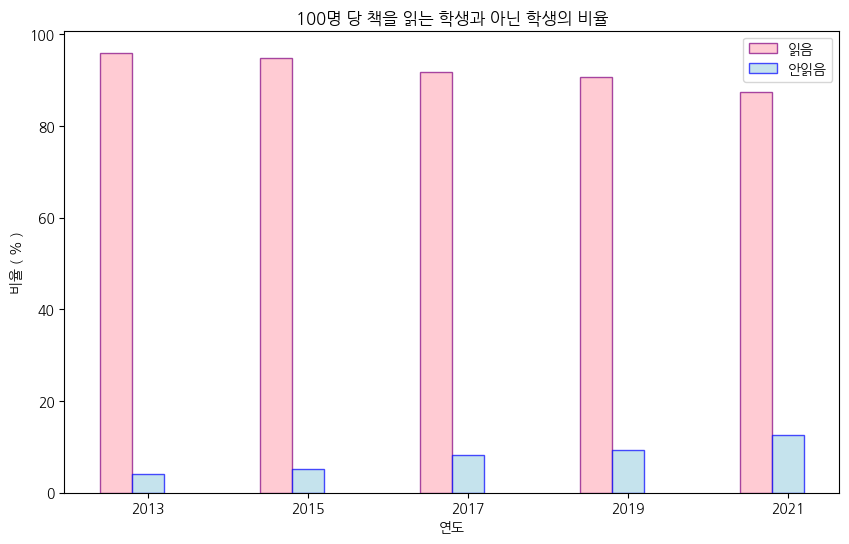

In [24]:
# 학생의 연도별 독서율

import csv
import seaborn as sns
import matplotlib.pyplot as plt

f = open('howmanyreadstu.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

plt.rcParams['font.family'] = 'NanumGothic'

years = []
a = []
b = []
c = []
d = []

for row in data:
    if '전체' in row[0]:
        years = [int(year) for year in header[3:]]
        if '소계' in row[1]:
          if '읽음' == row[2]:
            a = [float(count) for count in row[3:]]
          elif '안읽음' == row[2]:
            b = [float(count) for count in row[3:]]
plt.figure(figsize=(10, 6))
width = 0.2

x = range(len(years))

plt.bar([i - width for i in x], a, width=width, label='읽음', color='lightpink', alpha=0.7, edgecolor='purple', linewidth=1)
plt.bar(x, b, width=width, label='안읽음', color='lightblue', alpha=0.7, edgecolor='blue', linewidth=1)

plt.xlabel('연도')
plt.ylabel('비율 ( % )')
plt.title('100명 당 책을 읽는 학생과 아닌 학생의 비율')

plt.xticks(x, years)
plt.legend()
plt.show()



- 학생들은 대부분 90% 이상이 책을 읽고 있으며 그 추세는 계속 감소하고 있습니다.


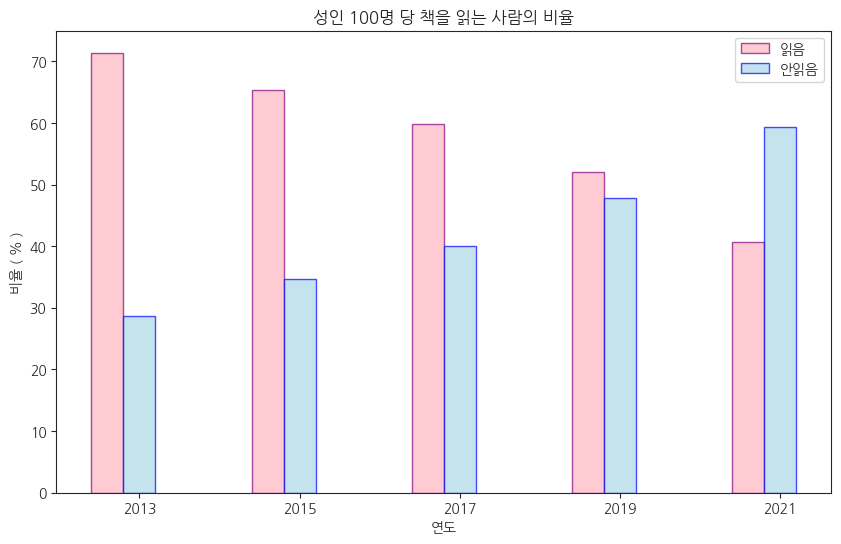

In [2]:
# 성인의 연도별 독서율

import csv
import seaborn as sns
import matplotlib.pyplot as plt

f = open('howmanyreadadu.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

plt.rcParams['font.family'] = 'NanumGothic'

years = []
a = []
b = []
c = []
d = []

for row in data:
    if '전체' in row[0]:
        years = [int(year) for year in header[3:]]
        if '소계' in row[1]:
          if '읽음' == row[2]:
            a = [float(count) for count in row[3:]]
          elif '안읽음' == row[2]:
            b = [float(count) for count in row[3:]]
plt.figure(figsize=(10, 6))
width = 0.2

x = range(len(years))

plt.bar([i - width for i in x], a, width=width, label='읽음', color='lightpink', alpha=0.7, edgecolor='purple', linewidth=1)
plt.bar(x, b, width=width, label='안읽음', color='lightblue', alpha=0.7, edgecolor='blue', linewidth=1)

plt.xlabel('연도')
plt.ylabel('비율 ( % )')
plt.title('성인 100명 당 책을 읽는 사람의 비율')

plt.xticks(x, years)
plt.legend()
plt.show()



- 학생에 비해서 성인은 대체로 책을 많이 읽지 않으며, 그마저도 2019년 이상에 들어서는 안읽는 성인이 더 많아졌다고 합니다.



책을 가장 많이 읽는 계층 :  초등학교 5학년


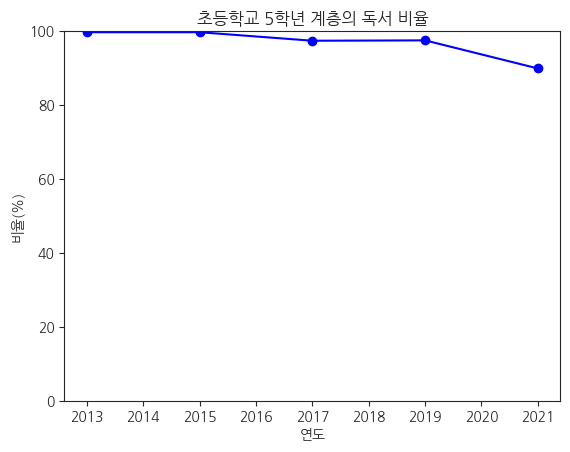

In [16]:
# 추가 ) 가장 많이 책을 읽는 학생 계층

import csv
import seaborn as sns
import matplotlib.pyplot as plt

f = open('howmanyreadstu.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

years = [2013,2015,2017,2019,2021]
a = []
b = []
c = []
d = []


rum = 0
max = -999
maxindex = []

for row in data :
  if '학교급 학년' in row[0] :
    if '읽음' == row[2]:
      for i in row[3:]:
          rum += float(i)
          rum = rum/5
          if rum>=max:
            max = rum
            maxindex = row
          else:
            continue
    else:
      continue
  else:
    continue

print('책을 가장 많이 읽는 계층 : ',maxindex[1])

for i in maxindex[3:]:
  a.append(float(i))

plt.plot(years, a, marker='o', label='읽음', color='b')

plt.xlabel('연도')
plt.ylabel('비율(%)')
plt.title(f'{maxindex[1]} 계층의 독서 비율')

plt.ylim(0, 100)

plt.show()

- 초등학교 5학년이 가장 책을 많이 읽네요.


책을 가장 많이 읽는 계층 :  30~39세


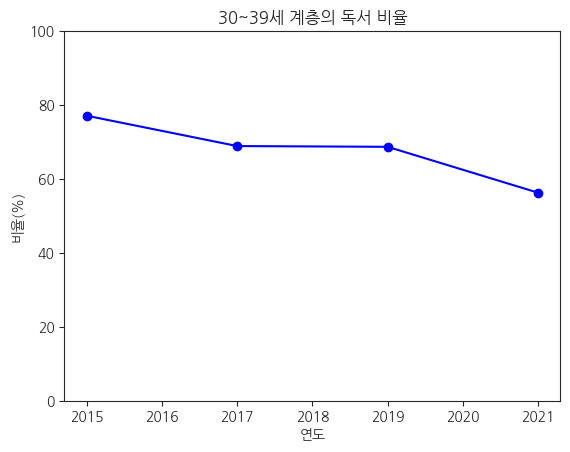

In [18]:
# 추가 ) 가장 많이 책을 읽는 성인 계층

import csv
import seaborn as sns
import matplotlib.pyplot as plt

f = open('howmanyreadadu.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

years = [2015,2017,2019,2021]
a = []
b = []
c = []
d = []


rum = 0
max = -999
maxindex = []

for row in data :
  if '연령별' in row[0] :
    if '읽음' == row[2]:
      for i in row[4:]:
          rum += float(i)
          rum = rum/4
          if rum>=max:
            max = rum
            maxindex = row
          else:
            continue
    else:
      continue
  else:
    continue

print('책을 가장 많이 읽는 계층 : ',maxindex[1])

for i in maxindex[4:]:
  a.append(float(i))

plt.plot(years, a, marker='o', label='읽음', color='b')

plt.xlabel('연도')
plt.ylabel('비율(%)')
plt.title(f'{maxindex[1]} 계층의 독서 비율')

plt.ylim(0, 100)

plt.show()

- 성인은 2013년 데이터가 통째로 결측치여서 빼고 진행하였고 30~39세가 가장 많이 읽네요.


2-3. 데이터 분석 ( 여가 활동 )


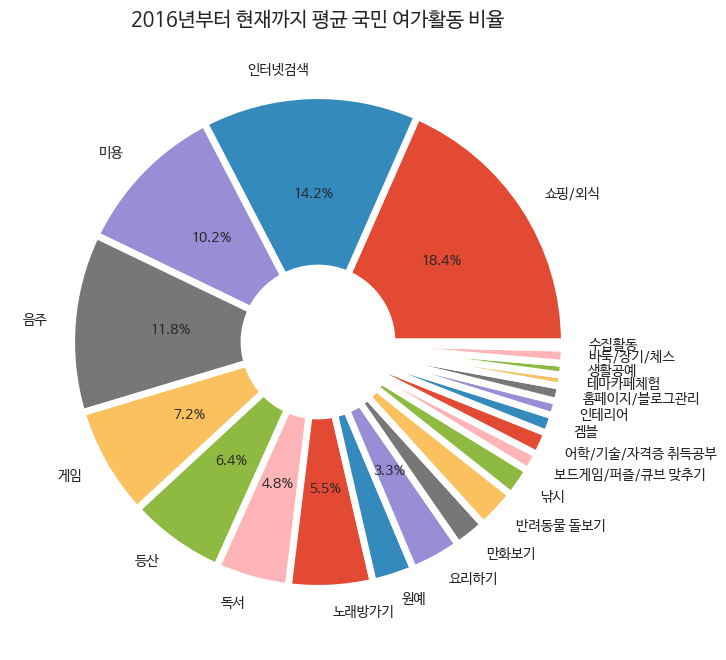

In [55]:
# 2016년부터 현재까지 평균적으로 국민들의 여가활동 비율 중 독서는 얼마나 될까?

import csv
from matplotlib import pyplot as plt

with open('1yactivity.csv', encoding='cp949') as csvfile:
    data = csv.reader(csvfile)
    header = next(data)
    header = next(data)
    values = []
    labels = []

    for row in data:
        if row[0] == '전체' and row[1] == '소계':
            sum = 0
            for value in row[3:10]:
                if value == '-':
                    value = '0.0'
                sum += float(value)
            av = sum / 6
            values.append(av)
            labels.append(row[2])


plt.figure(figsize=(8, 8), dpi=100)

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.pie(values, labels=labels, labeldistance=1.1, autopct=lambda p: f'{p:.1f}%' if p > 3 else '',wedgeprops = wedgeprops )

plt.title('2016년부터 현재까지 평균 국민 여가활동 비율')

plt.show()


- 독서는 7순위로 상당히 밀려나 있음을 알 수 있다.
( 람다함수를 이용해서 비율이 3% 미만인 값은 공백 비율로 반환하여 표시하지 않음. 한글 겹치는 것은 해결해 보려 했으나 실패 )

여가활동 중 독서가 가장 많은 비율을 차지하는 연령대 :  15~19세


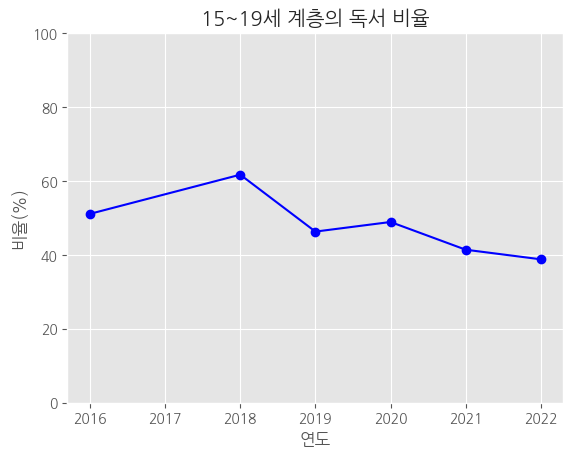

In [57]:
# 추가 ) 여가활동 중 독서의 비율이 가장 높은 연령대

import csv
import seaborn as sns
import matplotlib.pyplot as plt

f = open('1yactivity.csv', encoding='cp949')
data = csv.reader(f)
header = next(data)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

years = [2016,2018,2019,2020,2021,2022]
a = []
b = []
c = []
d = []


rum = 0
max = -999
maxindex = []

for row in data :
  if '연령별' in row[0] :
    if '독서' == row[2]:
      for i in row[3:]:
          rum += float(i)
          rum = rum/6
          if rum>=max:
            max = rum
            maxindex = row
          else:
            continue
    else:
      continue
  else:
    continue

print('여가활동 중 독서가 가장 많은 비율을 차지하는 연령대 : ',maxindex[1])

for i in maxindex[3:]:
  a.append(float(i))

plt.plot(years, a, marker='o', label='읽음', color='b')

plt.xlabel('연도')
plt.ylabel('비율(%)')
plt.title(f'{maxindex[1]} 계층의 독서 비율')

plt.ylim(0, 100)

plt.show()

- 15 ~ 19세의 학생들은 여가활동 중 거의 50%가량을 독서에 투자하고 있으며, 이를 중심으로 독서 정책을 어떻게 개선해야 할지 생각해볼 수 있다.

2-4. 데이터 분석 ( 왜 독서활동에 참여하지 않는가?)


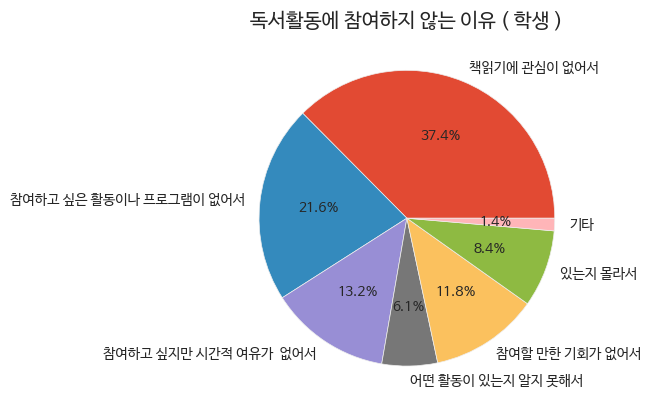

In [69]:
## 2015년 ~ 현재까지 독서활동에 참여하지 않는 이유  ( 학생 중 전체  )

import csv
from matplotlib import pyplot as plt

with open('whynotread.csv', encoding='cp949') as csvfile:
    data = csv.reader(csvfile)
    header = next(data)
    header = next(data)
    values = []
    labels = []

    for row in data:
        if row[0] == '전체' and row[1] == '소계' and row[2]== '소계' :
            sum = 0
            for value in row[4:8]:
                if value == '-':
                    value = '0.0'
                sum += float(value)
            av = sum / 4
            values.append(av)
            labels.append(row[3])

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.pie(values, labels=labels, labeldistance=1.1,autopct='%1.1f%%')

plt.title('독서활동에 참여하지 않는 이유 ( 학생 )')

plt.show()


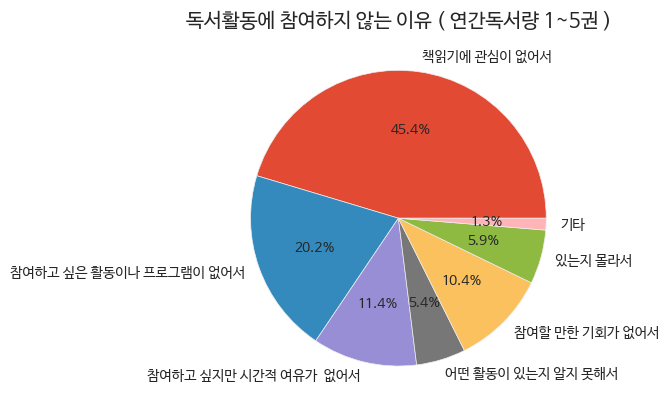

In [82]:
## 2015년 ~ 현재까지 독서활동에 참여하지 않는 이유  ( 연간독서량  )

import csv
from matplotlib import pyplot as plt

with open('whynotread.csv', encoding='cp949') as csvfile:
    data = csv.reader(csvfile)
    header = next(data)
    header = next(data)
    values = []
    labels = []

    for row in data:
        if row[0] == '연간독서량(종이책기준)' and row[1] == '1~5권' and row[2]== '소계' and row[3] != '사례수' :
            sum = 0
            for value in row[4:8]:
                if value == '-':
                    value = '0.0'
                sum += float(value)
            av = sum / 4
            values.append(av)
            labels.append(row[3])

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.pie(values, labels=labels, labeldistance=1.1,autopct='%1.1f%%')

plt.title('독서활동에 참여하지 않는 이유 ( 연간독서량 1~5권 )')

plt.show()


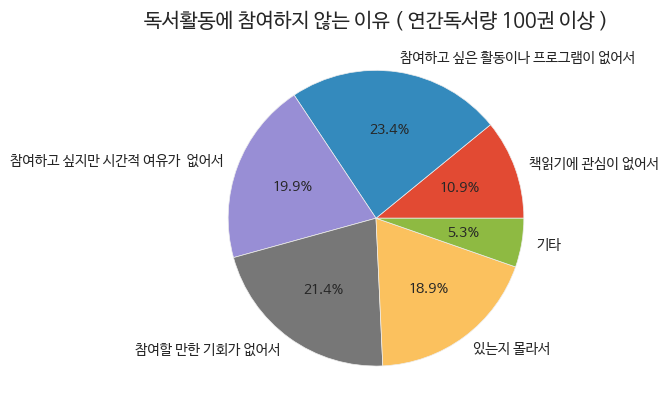

In [83]:
## 2015년 ~ 현재까지 독서활동에 참여하지 않는 이유  ( 연간독서량  )

import csv
from matplotlib import pyplot as plt

with open('whynotread.csv', encoding='cp949') as csvfile:
    data = csv.reader(csvfile)
    header = next(data)
    header = next(data)
    values = []
    labels = []

    for row in data:
        if row[0] == '연간독서량(종이책기준)' and row[1] == '100권 이상' and row[2]== '소계' and row[3] != '사례수' :
            sum = 0
            for value in row[4:8]:
                if value == '-':
                    value = '0.0'
                sum += float(value)
            av = sum / 4
            values.append(av)
            labels.append(row[3])

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.pie(values, labels=labels, labeldistance=1.1,autopct='%1.1f%%')

plt.title('독서활동에 참여하지 않는 이유 ( 연간독서량 100권 이상 )')

plt.show()


- 위 2개의 그래프를 통해 책을 잘 읽지 않는 사람들에게는 흥미로운 책을 찾아주어 독서에 대한 관심을 높이는 것이 필요하고, 책을 많이 읽는 사람들에게는 쉽고 재밌게 참여할 수 있는 독서 프로그램이 필요하다는 것을 알 수 있다.